In [4]:
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pickle
import os

dir_path = "/shared/share_mala/andrew/diss/szhalf_L12_delta_-2_to_2_interval_4000_secondDelta_1_to_1_interval_1_data"

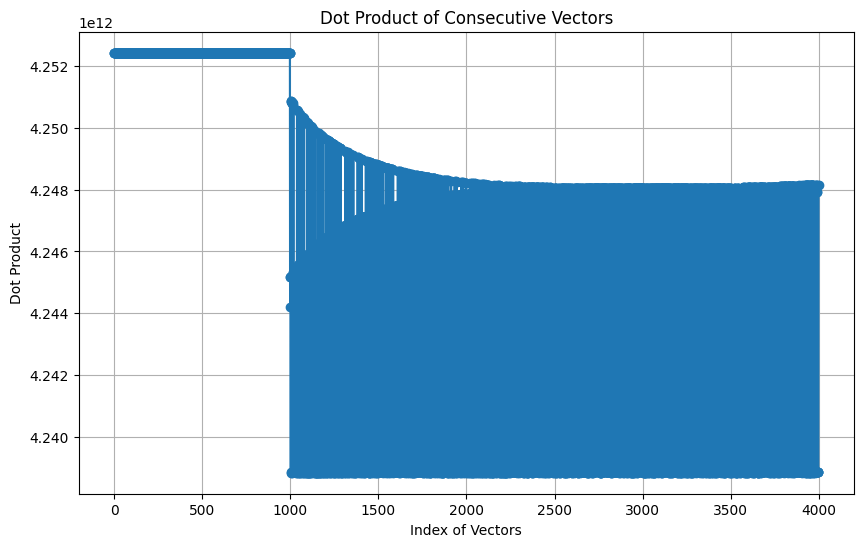

In [5]:
number_of_bins = 100000
pickle_file_path = f"{dir_path}/{number_of_bins}_binned_values.pkl"

with open(pickle_file_path, "rb") as f:
    binned_values_loaded = pickle.load(f)

print(f"Binned values loaded from pickle file (first 10): {binned_values_loaded[:10]}")


# Calculate the dot product of each pair of consecutive vectors
dot_products = [np.abs(np.dot(binned_values_loaded[i], binned_values_loaded[i+1])) for i in range(len(binned_values_loaded) - 1)]

# Plot the dot product plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(dot_products)), dot_products, marker='o')
plt.xlabel('Index of Vectors')
plt.ylabel('Dot Product')
plt.title('Dot Product of Consecutive Vectors')
plt.grid(True)
plt.show()


100%|██████████| 3999/3999 [00:05<00:00, 704.84it/s]


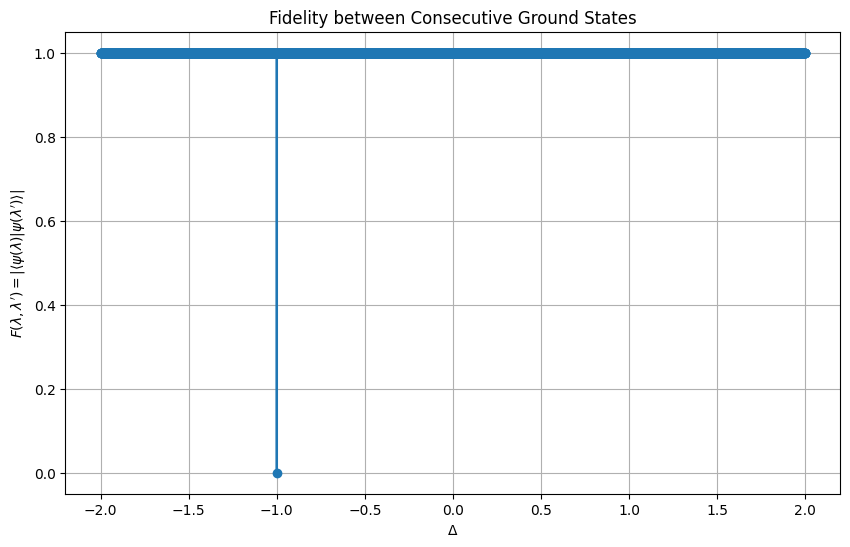

In [10]:
import os

binned_values = 4000

dot_products_ground_states = []

for i in trange(binned_values - 1):
    file_path_1 = os.path.join(dir_path, f"delta_{i}_second_delta_0.npy")
    file_path_2 = os.path.join(dir_path, f"delta_{i+1}_second_delta_0.npy")
    
    if os.path.exists(file_path_1) and os.path.exists(file_path_2):
        ground_state_1 = np.load(file_path_1)
        ground_state_2 = np.load(file_path_2)
        
        dot_product = np.abs(np.dot(ground_state_1, ground_state_2))
        dot_products_ground_states.append(dot_product)

# Plot the dot product plot for ground states
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-2, 2, len(dot_products_ground_states)), dot_products_ground_states, marker='o')
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$F(\lambda, \lambda^\prime) = |\langle \psi(\lambda) | \psi(\lambda^\prime) \rangle|$') 
plt.title('Fidelity between Consecutive Ground States')
plt.grid(True)
plt.show()


In [ ]:
import os

binned_values = 4000

# Initialize a 2D array to store dot products between all pairs of ground states
dot_products_ground_states = np.zeros((binned_values, binned_values))

# Load all ground states into memory
ground_states = []
for i in range(binned_values):
    file_path = os.path.join(dir_path, f"delta_{i}_second_delta_0.npy")
    if os.path.exists(file_path):
        ground_state = np.load(file_path)
        ground_states.append(ground_state)
    else:
        ground_states.append(None)

# Compute the dot product for each pair of ground states
for i in trange(binned_values):
    for j in range(binned_values):
        if ground_states[i] is not None and ground_states[j] is not None:
            dot_product = np.abs(np.dot(ground_states[i], ground_states[j]))
            dot_products_ground_states[i, j] = dot_product

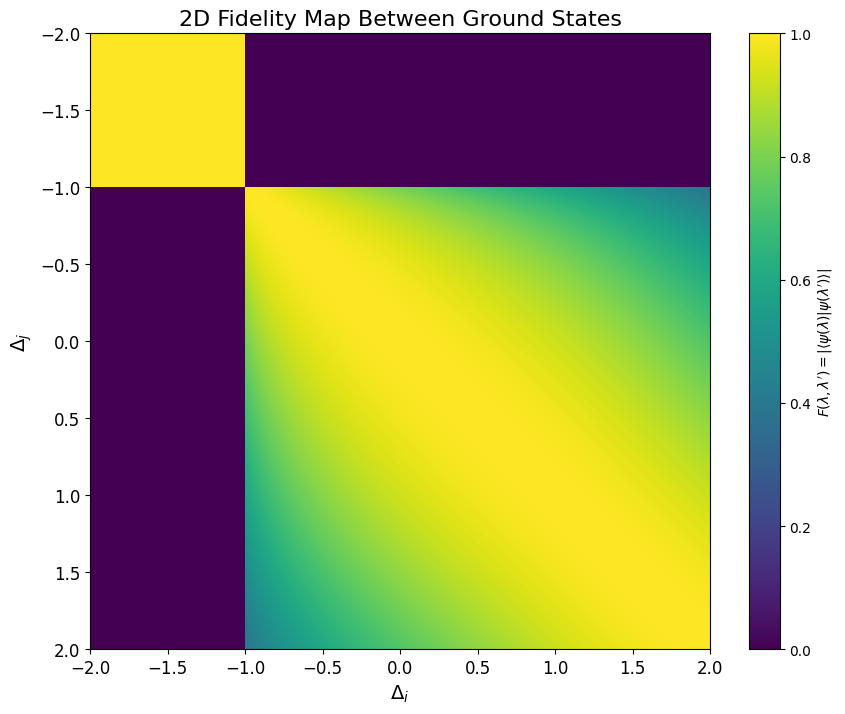

In [21]:
# Plot the 2D map of dot products
plt.figure(figsize=(10, 8))
extent = [-2, 2, 2, -2]
plt.imshow(dot_products_ground_states, cmap='viridis', interpolation='none', extent=extent, aspect='auto')
plt.colorbar(label=r'$F(\lambda, \lambda^\prime) = |\langle \psi(\lambda) | \psi(\lambda^\prime) \rangle|$')
plt.xlabel(r'$\Delta_i$', fontsize=14)
plt.ylabel(r'$\Delta_j$', fontsize=14)
plt.title('2D Fidelity Map Between Ground States', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()